## **Dataset: Adult - UCI Machine Learning Repository**

Link: https://archive.ics.uci.edu/dataset/2/adult

Neste documento, você encontrará uma análise realizada  sobre uma base de dados do census. Com o objetivo de que os modelos de Machine Learning posteriormente não se tornem enviesados, vamos realizar uma análise em cada atributo com o objetivo de criar insights para o seu tratamento.

### **Passo a Passo para o desenvolvimento do Projeto:**

1. Abordar o problema e Analisar;
2. Obter os dados;
3. Explorar os dados;
4. Tratamento dos dados;
5. Explorar vários modelos;
6. Otimização do melhor modelo;
7. Apresentar a Solução;


### **1. Abordar o problema e Analisar:**

- Objetivo: Conseguir **identificar** registros que possuam uma **renda** maior ou menor ou igual do que **US$50.000** por ano.

### **2. Obter os dados:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
dataset = pd.read_csv("data/adult.csv")
dataset

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### **3. Explorar os Dados:**

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X0      32560 non-null  int64 
 1    X1     32560 non-null  object
 2    X2     32560 non-null  int64 
 3    X3     32560 non-null  object
 4    X4     32560 non-null  int64 
 5    X5     32560 non-null  object
 6    X6     32560 non-null  object
 7    X7     32560 non-null  object
 8    X8     32560 non-null  object
 9    X9     32560 non-null  object
 10   X10    32560 non-null  int64 
 11   X11    32560 non-null  int64 
 12   X12    32560 non-null  int64 
 13   X13    32560 non-null  object
 14   X14    32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Nota-se que as colunas na base de dados estão ausentes. Neste caso, é essencial preenche-las para que os dados sejam mais fáceis de serem visualizados.

In [4]:
dataset.columns = ["age", "workclass", "fnlwgt", "education","education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

In [5]:
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
dataset["ID"] = range(1, len(dataset) +1)

 Neste momento, será analisado cada atributo da base de dados com o objetivo de encontrar outliers, valores faltantes e incoerentes.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
 15  ID              32560 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


##### Intervalo entre Quartis - IQR

Link Matéria: https://docs.oracle.com/cloud/help/pt_BR/pbcs_common/PFUSU/insights_metrics_IQR.htm#PFUSU-GUID-CF37CAEA-730B-4346-801E-64612719FF6B

In [8]:
def InterQuartileRange(dataset, colname):

    description = dataset[colname].describe()
    
    Q1 = description["25%"]
    Q3 = description["75%"]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Valor Limite.
    upper_bound = Q3 + 1.5 * IQR  # Valor Máximo.

    return lower_bound, upper_bound

Para estabelecer o que é um outlier, optei por utilizar um conceito da estatística chamada *Intervalo entre Quartis - IQR* que irá me retornar um valor mínimo e máximo do que pode ser considerado um outlier ou não. Este método consiste em eliminar quaisquer tipo de influência causada por valores extremos.

#### **3.1 - Age:**

In [11]:
dataset["age"].describe()

count    32560.000000
mean        38.581235
std         13.640439
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [12]:
dataset["age"].isna().sum()

np.int64(0)

Text(0.5, 0, 'Age')

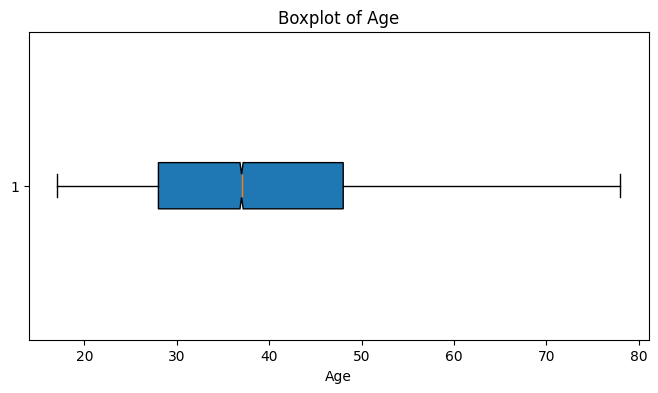

In [13]:
plt.figure(figsize=(8,4))
plt.boxplot(dataset["age"], orientation='horizontal', patch_artist=True, vert=False, showfliers=False, notch= True)
plt.title("Boxplot of Age")
plt.xlabel("Age")

In [14]:
lower_bound, upper_bound = InterQuartileRange(dataset, "age")
lower_bound, upper_bound  

(np.float64(-2.0), np.float64(78.0))

In [15]:
dataset.loc[dataset["age"] > upper_bound]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,ID
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K,75
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K,223
430,80,?,107762,HS-grad,9,Widowed,?,Not-in-family,White,Male,0,0,24,United-States,<=50K,431
918,81,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K,919
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K,1041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32277,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K,32278
32367,90,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K,32368
32459,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K,32460
32494,82,?,403910,HS-grad,9,Never-married,?,Not-in-family,White,Male,0,0,3,United-States,<=50K,32495


O atributo "age" não precisa de tratamento uma vez que o intervalo entre os valores aparentam ser coerentes a realidade. O InterQuartileRange retornar 143 registros como Outliers, mas essa quantidade de dados não possui impacto para os algoritmos serem enviesados.

#### **3.2 - workclass:**

In [16]:
group_wc = dataset.groupby(["workclass"]).size()
group_wc

workclass
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1115
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
dtype: int64

<Axes: xlabel='workclass'>

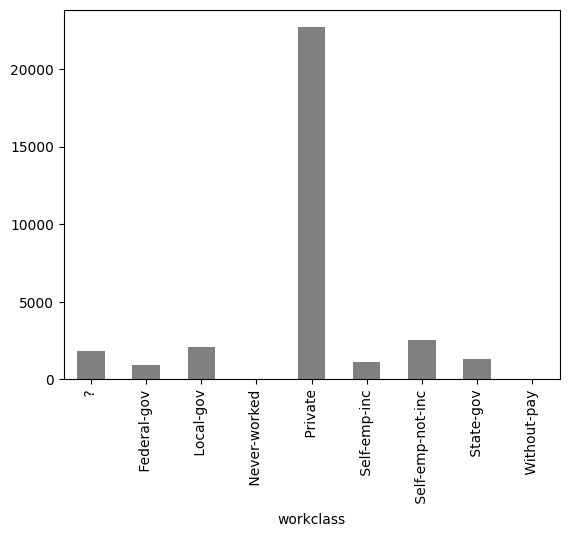

In [17]:
group_wc.plot.bar(color='gray')


In [18]:
moda = group_wc.loc[group_wc == group_wc.max()]
moda

workclass
Private    22696
dtype: int64

No atributo workclass, foi encontrado um valor chamado "?" que pode ser considerado um valor faltante ou incoerente. Para resolvermos esse caso, irei substituir os registros com esse rótulo pela moda dos atributos que como visto anteriormente é o "Private".

#### **3.3 -  fnlwgt**

In [19]:
dataset["fnlwgt"].describe()

count    3.256000e+04
mean     1.897754e+05
std      1.055502e+05
min      1.228500e+04
25%      1.178242e+05
50%      1.783560e+05
75%      2.370458e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

Text(0.5, 0, 'Final Weight')

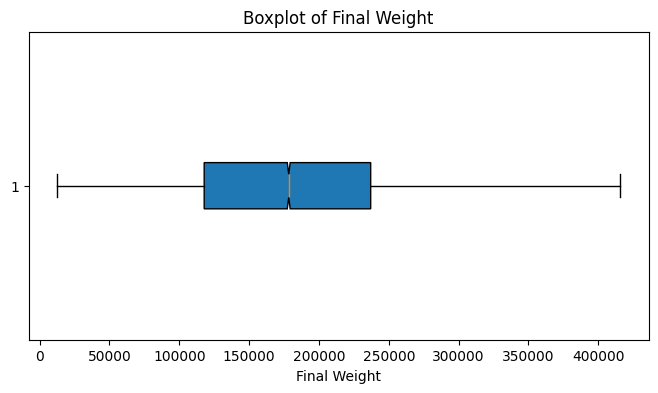

In [20]:
plt.figure(figsize=(8,4))
plt.boxplot(dataset["fnlwgt"], orientation='horizontal', patch_artist=True, vert=False, showfliers=False, notch= True)
plt.title("Boxplot of Final Weight")
plt.xlabel("Final Weight")

In [21]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'ID'],
      dtype='object')

Text(0, 0.5, 'Final Weight')

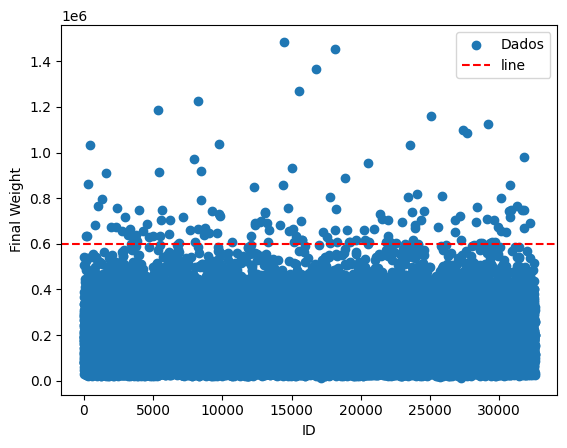

In [9]:
plt.scatter(x=dataset.ID, y=dataset.fnlwgt, label="Dados")
plt.axhline(0.6*10**6, color='red',linestyle='--', label='line')
plt.legend()
plt.xlabel("ID")
plt.ylabel("Final Weight")

In [23]:
lower_bound, upper_bound = InterQuartileRange(dataset, 'fnlwgt')

outliers_fnlwgt = dataset.loc[(dataset['fnlwgt'] < lower_bound) | (dataset['fnlwgt'] > upper_bound)]
outliers_fnlwgt


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,ID
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K,38
40,31,Private,507875,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,43,United-States,<=50K,41
80,18,Private,446839,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,0,30,United-States,<=50K,81
110,24,Private,432376,Bachelors,13,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,<=50K,111
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,<=50K,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32306,24,Private,427686,1st-4th,2,Married-civ-spouse,Handlers-cleaners,Other-relative,White,Male,0,0,40,Mexico,<=50K,32307
32329,28,Private,435842,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,32330
32470,50,Private,485710,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K,32471
32496,18,Private,436163,11th,7,Never-married,Prof-specialty,Own-child,White,Male,0,0,20,United-States,<=50K,32497


In [24]:
lower_bound, upper_bound

(np.float64(-61008.0), np.float64(415878.0))

In [25]:
dataset.loc[(dataset['fnlwgt'] > upper_bound)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,ID
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K,38
40,31,Private,507875,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,43,United-States,<=50K,41
80,18,Private,446839,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,0,30,United-States,<=50K,81
110,24,Private,432376,Bachelors,13,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,<=50K,111
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,<=50K,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32306,24,Private,427686,1st-4th,2,Married-civ-spouse,Handlers-cleaners,Other-relative,White,Male,0,0,40,Mexico,<=50K,32307
32329,28,Private,435842,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,32330
32470,50,Private,485710,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K,32471
32496,18,Private,436163,11th,7,Never-married,Prof-specialty,Own-child,White,Male,0,0,20,United-States,<=50K,32497


#### **3.4 - education:**

In [26]:
group_edu = dataset.groupby(["education"]).size()
group_edu

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10500
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
dtype: int64

O atributo "education" não precisa de tratamento uma vez que não há valores nulos ou incoerentes.

#### **3.5 - education-num:**

In [27]:
dataset["education-num"].describe()

count    32560.000000
mean        10.080713
std          2.572753
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

<Axes: xlabel='education-num', ylabel='Count'>

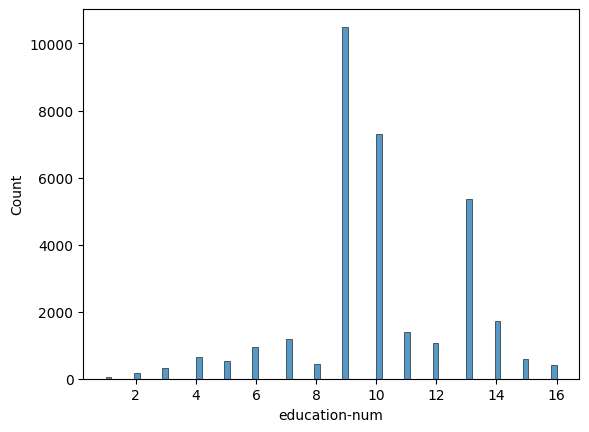

In [28]:
sn.histplot(dataset["education-num"])

O atributo "education-num" não precisa de tratamento uma vez que não há valores nulos ou incoerentes.

#### **3.6 - marital-status:**

In [29]:
group_ms = dataset.groupby(["marital-status"]).size()
group_ms

marital-status
Divorced                  4443
Married-AF-spouse           23
Married-civ-spouse       14975
Married-spouse-absent      418
Never-married            10683
Separated                 1025
Widowed                    993
dtype: int64

O atributo "marital-status" não precisa de tratamento uma vez que não há valores nulos ou incoerentes.

#### **3.7 - occupation:**

In [30]:
group_occ = dataset.groupby(["occupation"]).size()
group_occ

occupation
?                    1843
Adm-clerical         3770
Armed-Forces            9
Craft-repair         4099
Exec-managerial      4065
Farming-fishing       994
Handlers-cleaners    1370
Machine-op-inspct    2002
Other-service        3295
Priv-house-serv       149
Prof-specialty       4140
Protective-serv       649
Sales                3650
Tech-support          928
Transport-moving     1597
dtype: int64

<Axes: xlabel='occupation'>

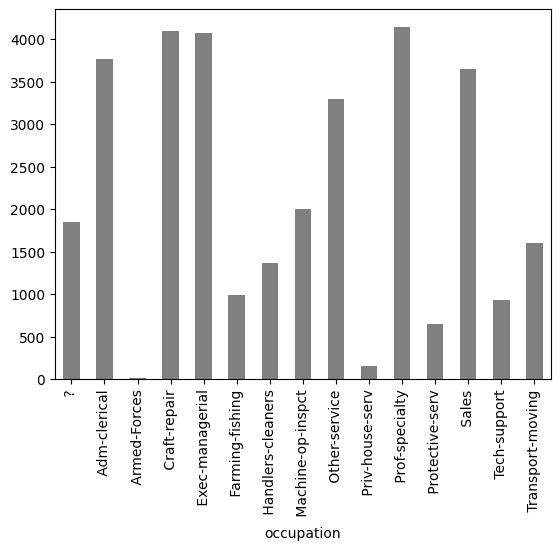

In [31]:
group_occ.plot.bar(color='gray')

In [32]:
group_occ.loc[group_occ == group_occ.max()]

occupation
Prof-specialty    4140
dtype: int64

No atributo occupation, foi encontrado um valor chamado "?" que pode ser considerado um valor faltante ou incoerente. Para resolvermos esse caso, irei substituir os registros com esse rótulo pela moda dos atributos que como visto anteriormente é o "Prof-specialty ".

#### **3.8 - relationship:**

In [33]:
group_rls = dataset.groupby(["relationship"]).size()
group_rls

relationship
Husband           13193
Not-in-family      8305
Other-relative      981
Own-child          5068
Unmarried          3446
Wife               1567
dtype: int64

O atributo "relationship" não precisa de tratamento uma vez que não há valores nulos e incoerentes.

#### **3.9 - race:**

In [34]:
group_race = dataset.groupby(["race"]).size()
group_race

race
Amer-Indian-Eskimo      311
Asian-Pac-Islander     1039
Black                  3124
Other                   271
White                 27815
dtype: int64

O atributo "race" não precisa de tratamento uma vez que não há valores nulos e incoerentes.

#### **3.10 - sex:**

In [35]:
group_sex = dataset.groupby(["sex"]).size()
group_sex

sex
Female    10770
Male      21790
dtype: int64

O atributo "sex" não precisa de tratamento uma vez que não há valores nulos e incoerentes.

#### **3.11 - capital-gain:**

In [36]:
dataset["capital-gain"].describe()

count    32560.000000
mean      1077.220516
std       7385.001042
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [37]:
dataset["capital-gain"].loc[dataset["capital-gain"] == 0].count()

np.int64(29849)

In [38]:
dataset["capital-gain"].loc[dataset["capital-gain"] != 0].count()

np.int64(2711)

In [39]:
lower_bound, upper_bound = InterQuartileRange(dataset, "capital-gain")
lower_bound, upper_bound 

(np.float64(0.0), np.float64(0.0))

Por mais que existam em predominância o valor 0, no contexto de ganhos capitais, devemos manter os valores acima de 0, pois dessa forma poderemos encontrar um perfil de pessoas que possua ganhos capitais

#### **3.12 - capital-loss:**

In [40]:
dataset["capital-loss"].describe()

count    32560.000000
mean        87.306511
std        402.966116
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [41]:
dataset["capital-loss"].loc[dataset["capital-loss"] == 0].count()

np.int64(31041)

In [42]:
dataset["capital-loss"].loc[dataset["capital-loss"] != 0].count()

np.int64(1519)

In [43]:
lower_bound, upper_bound = InterQuartileRange(dataset, "capital-loss")
lower_bound, upper_bound 

(np.float64(0.0), np.float64(0.0))

Por mais que existam em predominância o valor 0, no contexto de percas capitais, devemos manter os valores acima de 0, pois dessa forma poderemos encontrar um perfil de pessoas que possua percas capitais

#### **3.13 - hours-per-week:**

In [44]:
dataset["hours-per-week"].describe()

count    32560.000000
mean        40.437469
std         12.347618
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

Text(0.5, 0, 'hours-per-week')

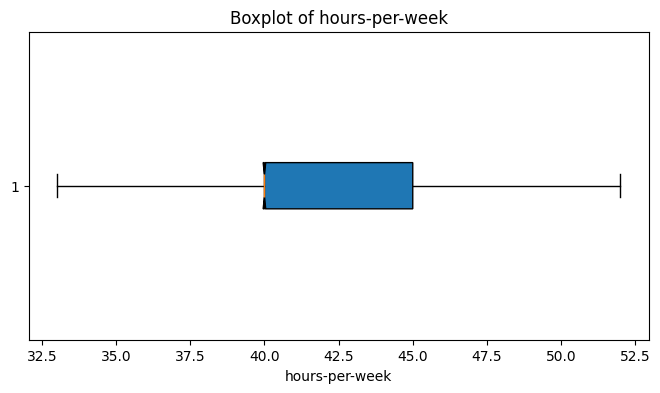

In [45]:
plt.figure(figsize=(8,4))
plt.boxplot(dataset["hours-per-week"], orientation='horizontal', patch_artist=True, vert=False, showfliers=False, notch= True)
plt.title("Boxplot of hours-per-week")
plt.xlabel("hours-per-week")

In [46]:
lower_bound, upper_bound = InterQuartileRange(dataset, "hours-per-week")
lower_bound, upper_bound

(np.float64(32.5), np.float64(52.5))

In [47]:
dataset.loc[(dataset["hours-per-week"] < lower_bound) | (dataset["hours-per-week"] > upper_bound)]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,ID
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,7
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,11
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K,13
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K,32545
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K,32546
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K,32549
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,32554


O atributo não precisa de tratamento uma vez que não há valores nulos e incoerentes.

#### **3.14- native-country:**

In [48]:
group_nc = dataset.groupby(["native-country"]).size()
group_nc

native-country
?                               583
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua    

<Axes: xlabel='native-country'>

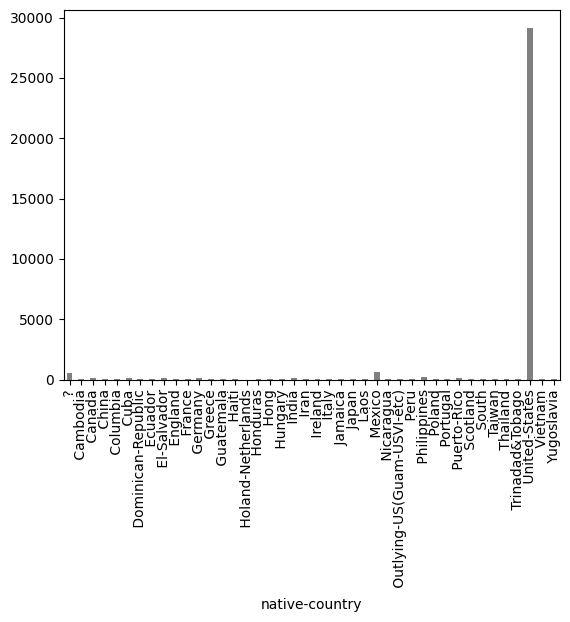

In [49]:
group_nc.plot.bar(color='gray')

In [50]:
group_nc.loc[group_nc == group_nc.max()]

native-country
United-States    29169
dtype: int64

No atributo native-country, foi encontrado um valor chamado "?" que pode ser considerado um valor faltante ou incoerente. Para resolvermos esse caso, irei substituir os registros com esse rótulo pela moda dos atributos que como visto anteriormente é o "United-States".

#### **3.15 - income:**

In [51]:
group_income = dataset.groupby(["income"]).size()
group_income

income
<=50K    24720
>50K      7840
dtype: int64

<Axes: xlabel='income', ylabel='count'>

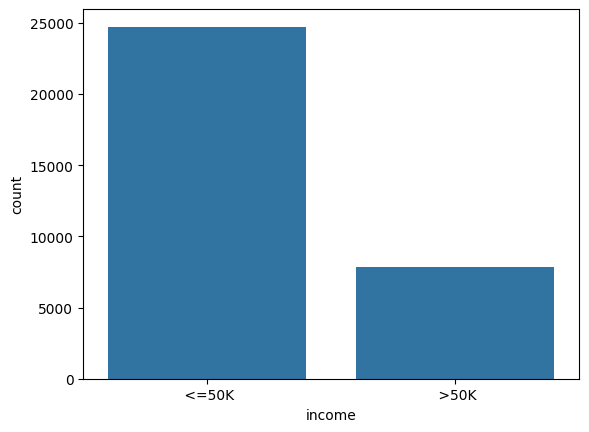

In [52]:
sn.countplot(x=dataset["income"])

In [53]:
print("O quanto os rótulos representam na base de dados:")
print(f"<=50K : {(group_income.iloc[0] / dataset.shape[0])*100:.2f}%")
print(f">50K : {(group_income.iloc[1] / dataset.shape[0])*100:.2f}%")

O quanto os rótulos representam na base de dados:
<=50K : 75.92%
>50K : 24.08%


Esta proporção dos rótulos indicam que os dados estão desbalanceados. Para o treinamento dos modelos isso pode se tornar um problema, pois esta base possuindo predominantemente registros com "<=50K" os modelos podem ter dificuldades em identificar registros com a renda ">50K".

### **Resultado da Análise:**
- 1.1 -  Tratamento no nome das colunas:
  - Substituir os valores assumidos pelos atributos declarados pela documentação da base de dados.
- 1.2 -  Tratar Valores Faltantes:
  - Workclass: substituir ? por Private
  - Occupation: substituir ? por Prof-specialty
  - Native-Country: substituir ? por United-States
- 1.3 - Tratar Valores Desbalanceados


- **Observação:** Nota-se que após aplicar o método Intervalo entre Quartis para a detecção de Outliers, algumas colunas como hours-per-week e fnlwgt retornaram uma quantidade considerável de possíveis outliers. No entanto, após o modelos estarem no processo de treinamento, notou-se que muitos deles perdiam um pouco do seu desempenho em relação a capacidade de classificação do que se os dados não fossem tratados. Contudo, foi decidido permanecer esses dados visando melhorar o desempenho do algoritmo.

### **4. Preparar os dados para os modelos de ML:**

<a href="2main.ipynb">Direcionando para o Arquivo de Preparação/Treinamento dos Dados</a>